In [1]:
# Dependencies 
import pandas as pd 
import numpy as np 
from statistics import pstdev
import matplotlib.pyplot as plt 
import seaborn as sns 


import glob
import random
import base64

from PIL import Image
from io import BytesIO
from IPython.display import HTML

%matplotlib inline


# Introduction

This notebook presents the results of the assignment that is carried out for the class Math, Statistics and R (MSR) of the the minor program 3DM that is provided by Hogeschool van Arnhem & Nijmegen. 

The notebook consists of the discription of the code that is written to calculate new columns and to create visuals.

## The assignment

The assignment for the lesson MSR is to create the table below with calculated columns such as mean, std_dev, skweness and kurtosis:

![title](assg1.png)


After the data dataset is created with the required columns, the visuals below will be created:

![title](assg.png)



# Importing the assignment dataset

Assignment dataset contains the grades of 10 students for 6 different courses.

In [2]:
df = pd.read_excel('StudentsGrade.xlsx')
df

,Students,Course1,Course2,Course3,Course4,Course5,Course6
0,a,3,9,9,3,8,9
1,b,8,8,7,4,8,8
2,c,9,10,9,9,6,10
3,d,4,7,4,2,7,9
4,e,7,9,8,4,7,9
5,f,10,7,4,3,4,8
6,g,5,9,8,5,7,10
7,h,6,9,5,4,6,10
8,i,4,8,6,4,4,10
9,j,7,7,5,1,4,9


So the dataset **df** is going to be used as the main dataset from which two different dataset will be created:
1. dfstudents
2. dfcourses

In the datasets **dfstudent** and **dfcourses** the columns below will be created:

1. Mean
2. Std_Dev
3. Skewness
4. Kurtosis
5. Average of Mean
6. Average of Std_Dev
7. Average of Skewness
8. Average of Kurtosis

Additionally in **dfstudent** the columns below will be created to calculate the count of grades (frequency & cumulative) 

1. Cumulative
2. Frequency
3. Cumulative%
4. Frequency%


# Data Preparation

## 1 Creating the dataset for students

In [3]:
dfstudent = df.copy()

# Creating a list of grades
grades = [0,1,2,3,4,5,6,7,8,9,10]
dfstudent['grade'] = grades
dfstudent.head(2)

,Students,Course1,Course2,Course3,Course4,Course5,Course6,grade
0,a,3,9,9,3,8,9,0
1,b,8,8,7,4,8,8,1


### Creating the columns Cumulative, Frequency, Cumulative% and Frequency%
The grade column is added, here below the 2 lists are created one for cumulative and another for frequency

In [4]:
# Creating the cumulative column
clist = [] # The list will be filled in with cumulative count of the condition <=i in the given columns
for i in dfstudent['grade']:
    x=dfstudent[dfstudent[['Course1','Course2','Course3','Course4','Course5','Course6']]<=i].count()   
    c = 0
    for j in x:
        c = c+j
    clist.append(c)   

    
# Creating the frequency column
flist = [] # The list will be filled in with frequency count of the condition ==i in the given columns
for i in dfstudent['grade']:
    x=dfstudent[dfstudent[['Course1','Course2','Course3','Course4','Course5','Course6']]==i].count()   
    c = 0
    for j in x:
        c = c+j
    flist.append(c) 


Here below the frequency and cumulative are calculated in percentile and created 2 more lists

In [5]:
# Cumulative % list (<=)
c_perc_list = []
count=dfstudent[['Course1','Course2','Course3','Course4','Course5','Course6']].count().sum()*100

for i in dfstudent['grade']:
    x=dfstudent[dfstudent[['Course1','Course2','Course3','Course4','Course5','Course6']]<=i].count().sum()
    y = round((x/count)*10000,1)
    c_perc_list.append(y)

# Frequency % list (==)
f_perc_list = []
count=dfstudent[['Course1','Course2','Course3','Course4','Course5','Course6']].count().sum()*100

for i in dfstudent['grade']:
    x=dfstudent[dfstudent[['Course1','Course2','Course3','Course4','Course5','Course6']]==i].count().sum()
    y = round((x/count)*10000,1)
    f_perc_list.append(y)

In [6]:
print(clist)
print(flist)
print(c_perc_list)
print(f_perc_list)

[0, 1, 2, 5, 16, 20, 25, 36, 46, 59, 66]
[0, 1, 1, 3, 11, 4, 5, 11, 10, 13, 7]
[0.0, 1.5, 3.0, 7.6, 24.2, 30.3, 37.9, 54.5, 69.7, 89.4, 100.0]
[0.0, 1.5, 1.5, 4.5, 16.7, 6.1, 7.6, 16.7, 15.2, 19.7, 10.6]


### Creating the columns Sum, Mean, Std_Dev, Skewness and Kurtosis

In [7]:
print(dfstudent.shape)
dfstudent.columns

(11, 8)


Index(['Students', 'Course1', 'Course2', 'Course3', 'Course4', 'Course5',
       'Course6', 'grade'],
      dtype='object')

**dfstudent** contains an additional column [grade]. While calculating mean, std_dev etc, it is easier to either remove this columns or make the statistical calculation on the main dataset, **df**, so that the grades are not included into calculattion (the column [Students] contains characters, so it is automatically not included into mathematical calculations) 

Here below the statistical calculations are made based on the main dataset **df**. Like the method used above to calculate the cumulative and frequency of the grades, also in this section 4 different lists will be created for mean, std_dev, skewness and kurtosis. After which these lists will be added into the **dfstudent**.  

In [8]:
# Sum of all grades of each Student
sumS_list = []
for s,i,j,k,x,y,z in df.itertuples(index=False):
    
    sumS_list.append(sum([i,j,k,x,y,z]))   
    
# Mean of all grades of each Student    
meanS_list = round(df.mean(axis=1),2)

# Std_Dev of all grades of each Student
stdS_list=[]
for s,i,j,k,x,y,z in df.itertuples(index=False):
    # Calculating STD_Dev for Population
    stdS_list.append(round(pstdev([i,j,k,x,y,z]),2)) 
    
# Skewness of all grades of each Student   
skewS_list = round(df.skew(axis=1),2)

# Kurtosis of all grades of each Student
kurtS_list = round(df.kurtosis(axis=1),2)

In [9]:
print(sumS_list)
print(list(meanS_list))
print(stdS_list)
print(list(skewS_list))
print(list(kurtS_list))

[41, 43, 53, 33, 44, 36, 44, 40, 36, 33, 47]
[6.83, 7.17, 8.83, 5.5, 7.33, 6.0, 7.33, 6.67, 6.0, 5.5, 7.83]
[2.73, 1.46, 1.34, 2.36, 1.7, 2.52, 1.89, 2.13, 2.31, 2.57, 1.34]
[-0.9, -2.15, -1.84, 0.0, -1.28, 0.43, -0.05, 0.6, 0.89, -0.61, 0.42]
[-1.9, 4.64, 3.91, -1.25, 1.85, -1.57, -1.72, -1.29, -0.78, 0.2, -0.86]


### Creating the mean columns of Mean, Std_Dev, Skewness and Kurtosis

To calculate the average of the columns created above, they must be added into the dataset **dfstudent**


In [10]:
# Cumulative & Frequency
dfstudent['Cumulative'] = clist
dfstudent['Frequency'] = flist
dfstudent['Cumulative%'] = c_perc_list
dfstudent['Frequency%'] = f_perc_list

# Sum, Mean, Std_Dev, Skewness and Kurtosis
dfstudent['Sum'] = sumS_list
dfstudent['Mean'] = meanS_list
dfstudent['Std_Dev'] = stdS_list
dfstudent['Skewness'] = skewS_list
dfstudent['Kurtosis'] = kurtS_list

dfstudent

,Students,Course1,Course2,Course3,Course4,Course5,Course6,grade,Cumulative,Frequency,Cumulative%,Frequency%,Sum,Mean,Std_Dev,Skewness,Kurtosis
0,a,3,9,9,3,8,9,0,0,0,0.0,0.0,41,6.83,2.73,-0.90,-1.90
1,b,8,8,7,4,8,8,1,1,1,1.5,1.5,43,7.17,1.46,-2.15,4.64
2,c,9,10,9,9,6,10,2,2,1,3.0,1.5,53,8.83,1.34,-1.84,3.91
3,d,4,7,4,2,7,9,3,5,3,7.6,4.5,33,5.50,2.36,0.00,-1.25
4,e,7,9,8,4,7,9,4,16,11,24.2,16.7,44,7.33,1.70,-1.28,1.85
5,f,10,7,4,3,4,8,5,20,4,30.3,6.1,36,6.00,2.52,0.43,-1.57
6,g,5,9,8,5,7,10,6,25,5,37.9,7.6,44,7.33,1.89,-0.05,-1.72
7,h,6,9,5,4,6,10,7,36,11,54.5,16.7,40,6.67,2.13,0.60,-1.29
8,i,4,8,6,4,4,10,8,46,10,69.7,15.2,36,6.00,2.31,0.89,-0.78
9,j,7,7,5,1,4,9,9,59,13,89.4,19.7,33,5.50,2.57,-0.61,0.20


In [11]:
dfstudent['Average_Mean']=round(dfstudent['Mean'].mean(),2)
dfstudent['Average_Std_Dev']=round(dfstudent['Std_Dev'].mean(),2)
dfstudent['Average_Skewness']=round(dfstudent['Skewness'].mean(),2)
dfstudent['Average_Kurtosis']=round(dfstudent['Kurtosis'].mean(),2)
dfstudent

,Students,Course1,Course2,Course3,Course4,Course5,Course6,grade,Cumulative,Frequency,...,Frequency%,Sum,Mean,Std_Dev,Skewness,Kurtosis,Average_Mean,Average_Std_Dev,Average_Skewness,Average_Kurtosis
0,a,3,9,9,3,8,9,0,0,0,...,0.0,41,6.83,2.73,-0.90,-1.90,6.82,2.03,-0.41,0.11
1,b,8,8,7,4,8,8,1,1,1,...,1.5,43,7.17,1.46,-2.15,4.64,6.82,2.03,-0.41,0.11
2,c,9,10,9,9,6,10,2,2,1,...,1.5,53,8.83,1.34,-1.84,3.91,6.82,2.03,-0.41,0.11
3,d,4,7,4,2,7,9,3,5,3,...,4.5,33,5.50,2.36,0.00,-1.25,6.82,2.03,-0.41,0.11
4,e,7,9,8,4,7,9,4,16,11,...,16.7,44,7.33,1.70,-1.28,1.85,6.82,2.03,-0.41,0.11
5,f,10,7,4,3,4,8,5,20,4,...,6.1,36,6.00,2.52,0.43,-1.57,6.82,2.03,-0.41,0.11
6,g,5,9,8,5,7,10,6,25,5,...,7.6,44,7.33,1.89,-0.05,-1.72,6.82,2.03,-0.41,0.11
7,h,6,9,5,4,6,10,7,36,11,...,16.7,40,6.67,2.13,0.60,-1.29,6.82,2.03,-0.41,0.11
8,i,4,8,6,4,4,10,8,46,10,...,15.2,36,6.00,2.31,0.89,-0.78,6.82,2.03,-0.41,0.11
9,j,7,7,5,1,4,9,9,59,13,...,19.7,33,5.50,2.57,-0.61,0.20,6.82,2.03,-0.41,0.11


## 2 Creating the dataset for Courses

Fisrt the main dataset **df** is transposed here below, so that the variables courses can be set into rows to make calculations (mean, sum etc) easier:

In [12]:
dfT = df
dfT=dfT.set_index('Students')
dfT=dfT.T
column_names = dfT.columns
dfT

Students,a,b,c,d,e,f,g,h,i,j,k
Course1,3,8,9,4,7,10,5,6,4,7,10
Course2,9,8,10,7,9,7,9,9,8,7,7
Course3,9,7,9,4,8,4,8,5,6,5,9
Course4,3,4,9,2,4,3,5,4,4,1,7
Course5,8,8,6,7,7,4,7,6,4,4,6
Course6,9,8,10,9,9,8,10,10,10,9,8


In [13]:
dfcourses = pd.DataFrame()

lisst = []
for i in dfT.index:
    lisst.append(i)

dfcourses['Course'] = lisst
    
    
lisst = []
for x in column_names:
    item = dfT[x].values
    lisst.append(item)
    dfcourses[x] = item

dfcourses

,Course,a,b,c,d,e,f,g,h,i,j,k
0,Course1,3,8,9,4,7,10,5,6,4,7,10
1,Course2,9,8,10,7,9,7,9,9,8,7,7
2,Course3,9,7,9,4,8,4,8,5,6,5,9
3,Course4,3,4,9,2,4,3,5,4,4,1,7
4,Course5,8,8,6,7,7,4,7,6,4,4,6
5,Course6,9,8,10,9,9,8,10,10,10,9,8


### Creating the columns Sum, Mean, Std_Dev, Skewness and Kurtosis

Creating lists for sum, mean, std_dev, skew and kurtosis

In [14]:
# Sum of all grades of each Course
sumC_list = dfcourses.sum(axis=1)

# Mean of all grades of each Course
meanC_list = round(dfcourses.mean(axis=1),2)

# Std_Dev of all grades of each Course
stdC_list=[]
for s,a,b,c,d,e,f,g,h,i,j,k in dfcourses.itertuples(index=False):
    # Calculating STD_Dev for Population
    stdC_list.append(round(pstdev([a,b,c,d,e,f,g,h,i,j,k ]),2)) 

# Skew of all grades of each Course
skewC_list = round(dfcourses.skew(axis=1),2)

# Kurtosis of all grades of each Course
kurtC_list = round(dfcourses.kurtosis(axis=1),2)

In [15]:
# Adding the lists above into dfcourses

dfcourses['Sum'] = sumC_list
dfcourses['Mean'] = meanC_list
dfcourses['Std_Dev'] = stdC_list
dfcourses['Skewness'] = skewC_list
dfcourses['Kurtosis'] = kurtC_list
dfcourses

,Course,a,b,c,d,e,f,g,h,i,j,k,Sum,Mean,Std_Dev,Skewness,Kurtosis
0,Course1,3,8,9,4,7,10,5,6,4,7,10,73,6.64,2.35,0.02,-1.32
1,Course2,9,8,10,7,9,7,9,9,8,7,7,90,8.18,1.03,0.15,-1.39
2,Course3,9,7,9,4,8,4,8,5,6,5,9,74,6.73,1.91,-0.18,-1.74
3,Course4,3,4,9,2,4,3,5,4,4,1,7,46,4.18,2.12,0.98,1.28
4,Course5,8,8,6,7,7,4,7,6,4,4,6,67,6.09,1.44,-0.40,-1.16
5,Course6,9,8,10,9,9,8,10,10,10,9,8,100,9.09,0.79,-0.19,-1.49


### Creating the mean columns for  Mean, Std_Dev, Skewness and Kurtosis

The columns needed are partly created for dfcourses. Herebelow the mean will be calculated for the columns created above.

In [16]:
dfcourses['Average_Mean'] = round(dfcourses.Mean.mean(),2)
dfcourses['Average_Std_Dev'] = round(dfcourses.Std_Dev.mean(),2)
dfcourses['Average_Skewness'] = round(dfcourses.Skewness.mean(),2)
dfcourses['Average_Kurtosis'] = round(dfcourses.Kurtosis.mean(),2)
dfcourses

,Course,a,b,c,d,e,f,g,h,i,...,k,Sum,Mean,Std_Dev,Skewness,Kurtosis,Average_Mean,Average_Std_Dev,Average_Skewness,Average_Kurtosis
0,Course1,3,8,9,4,7,10,5,6,4,...,10,73,6.64,2.35,0.02,-1.32,6.82,1.61,0.06,-0.97
1,Course2,9,8,10,7,9,7,9,9,8,...,7,90,8.18,1.03,0.15,-1.39,6.82,1.61,0.06,-0.97
2,Course3,9,7,9,4,8,4,8,5,6,...,9,74,6.73,1.91,-0.18,-1.74,6.82,1.61,0.06,-0.97
3,Course4,3,4,9,2,4,3,5,4,4,...,7,46,4.18,2.12,0.98,1.28,6.82,1.61,0.06,-0.97
4,Course5,8,8,6,7,7,4,7,6,4,...,6,67,6.09,1.44,-0.40,-1.16,6.82,1.61,0.06,-0.97
5,Course6,9,8,10,9,9,8,10,10,10,...,8,100,9.09,0.79,-0.19,-1.49,6.82,1.61,0.06,-0.97


# Visualization

The datasets needed to be able to re-create the assignment visuals, are created. There will be mainly 2 different visuals created: lineplot and barplot with line value. 

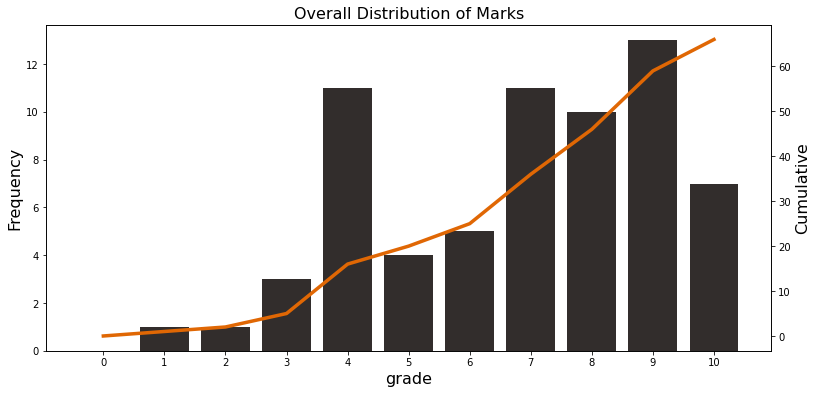

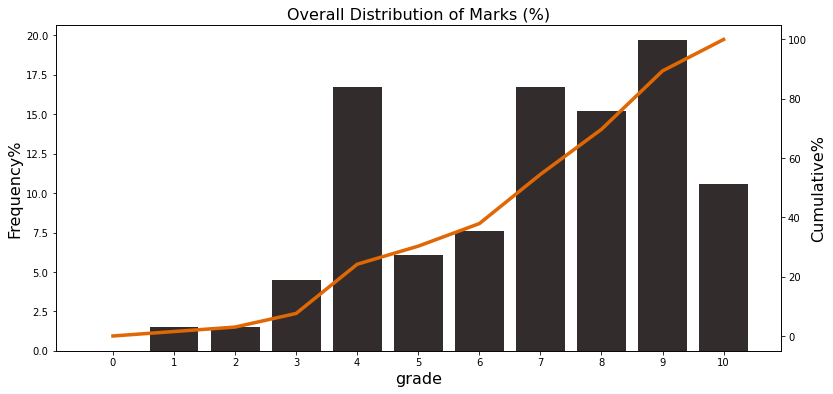

In [17]:
############### Frequency & Cumulative ################
# Subplot
fig, ax1 = plt.subplots(figsize=(13,6))
#Barplot
ax1.set_title('Overall Distribution of Marks', fontsize=16)
ax1.set_xlabel('Marks', fontsize=16)
ax1.set_ylabel('Frequency in number', fontsize=16)
ax1 = sns.barplot(x='grade', y='Frequency', data=dfstudent, color='#332c2b')
ax1.tick_params(axis='y')
# Creating another axis
ax2 = ax1.twinx()
# Lineplot
ax2 = sns.lineplot(x='grade', y='Cumulative', data=dfstudent, color='#e06704', linewidth=3.5)
ax2.set_ylabel('Cumulative', fontsize=16)

ax2.tick_params(axis='y')

############### Frequency% & Cumulative% ################
# Subplot
fig, ax1 = plt.subplots(figsize=(13,6))
#Barplot
ax1.set_title('Overall Distribution of Marks (%)', fontsize=16)
ax1.set_xlabel('Marks', fontsize=16)
ax1.set_ylabel('Frequency in number', fontsize=16)
ax1 = sns.barplot(x='grade', y='Frequency%', data=dfstudent, color='#332c2b')
ax1.tick_params(axis='y')
# Creating another axis
ax2 = ax1.twinx()
# Lineplot
ax2 = sns.lineplot(x='grade', y='Cumulative%', data=dfstudent, color='#e06704', linewidth=3.5)
ax2.set_ylabel('Cumulative%', fontsize=16)
ax2.tick_params(axis='y')

To avoid repetitive coding, we start with creating functions that create visuals. 

In [18]:
# Function for Student Visuals
def grade_student(column):
    fig, ax1 = plt.subplots(figsize=(15,6))
    sns.set_style('darkgrid')

    ax1.set_title((column+' of Grade by Students'), fontsize=16)
    ax1.set_xlabel('Students', fontsize=16)
    ax1.set_ylabel((column+' Grade'), fontsize=16)
    sns.lineplot(y=column, x='Students', data=dfstudent, ci=None, marker='o', color= '#e06704',label=(column+' of Grades by Student'), linewidth=5)
    x = sns.lineplot(y=('Average_'+column), x='Students', data=dfstudent, color='#332c2b', label=(column+' of Grades'), linewidth=5)
    x.lines[1].set_linestyle("--")

# Function for Course Visuals
def grade_course(column):
    fig, ax1 = plt.subplots(figsize=(15,6))
    sns.set_style('darkgrid')

    ax1.set_title((column+' of Grade by Course'), fontsize=16)
    ax1.set_xlabel('Courses', fontsize=16)
    ax1.set_ylabel((column+' Grade'), fontsize=16)
    sns.lineplot(y=column, x='Course', data=dfcourses, ci=None, marker='o', color= '#e06704',label=(column+' of Grades by Course'), linewidth=5)
    x = sns.lineplot(y=('Average_'+column), x='Course', data=dfcourses, color='#332c2b', label=(column+' of Grades'), linewidth=5)
    x.lines[1].set_linestyle("--")

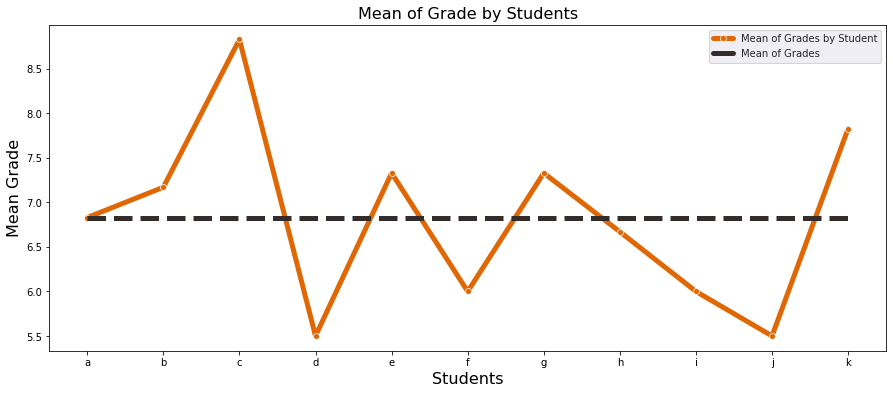

In [19]:
mean = grade_student('Mean')

As illustrated above the mean grade for all students is slightly above 6.5.  Student C has the highest mean of grade. Which means that this student is able to perform well in all lessons. 

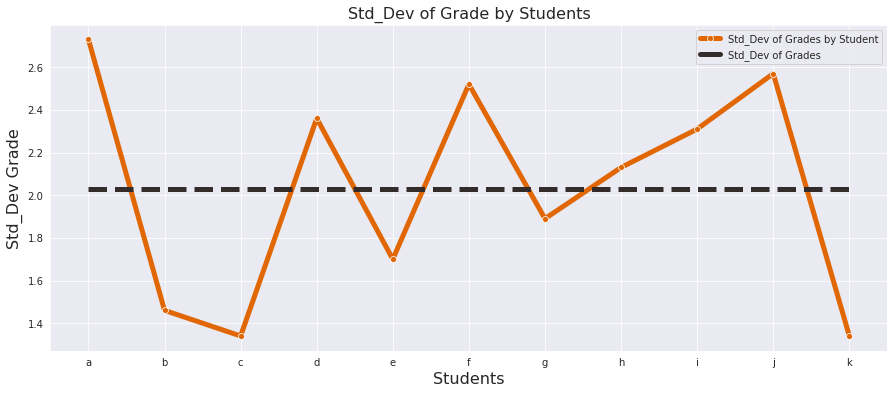

In [20]:
std = grade_student('Std_Dev')

Explanation here................

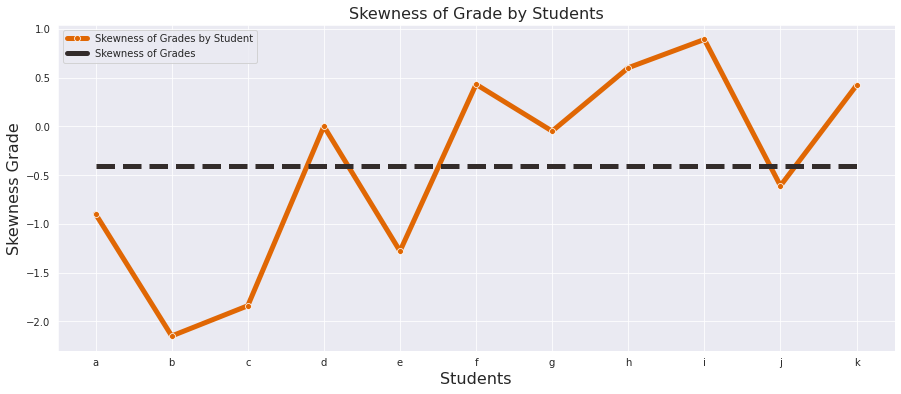

In [21]:
grade_student('Skewness')

Explanation here..............

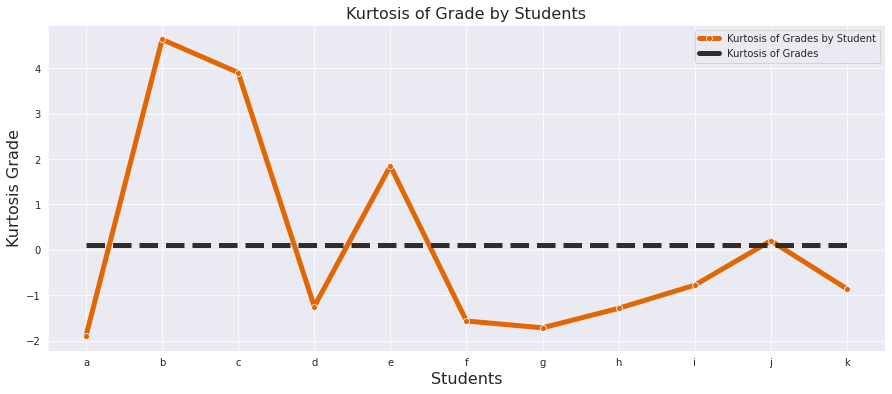

In [22]:
grade_student('Kurtosis')

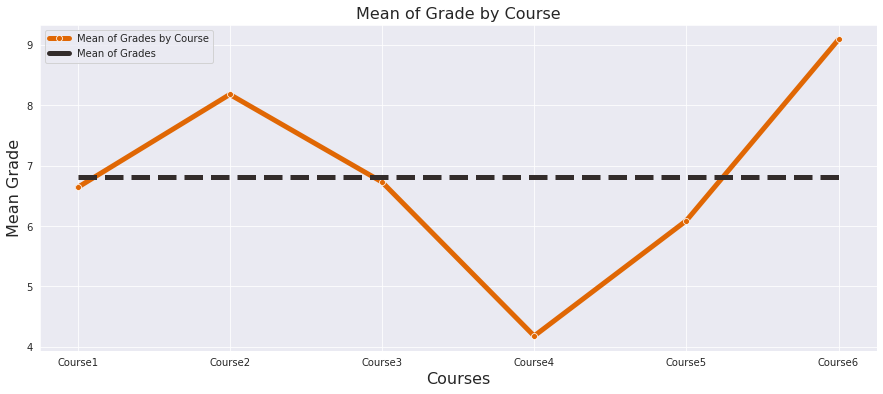

In [23]:
grade_course('Mean')

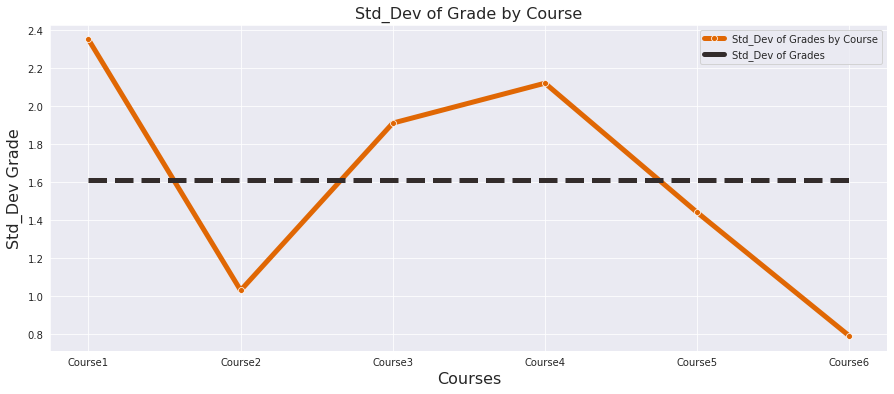

In [24]:
grade_course('Std_Dev')

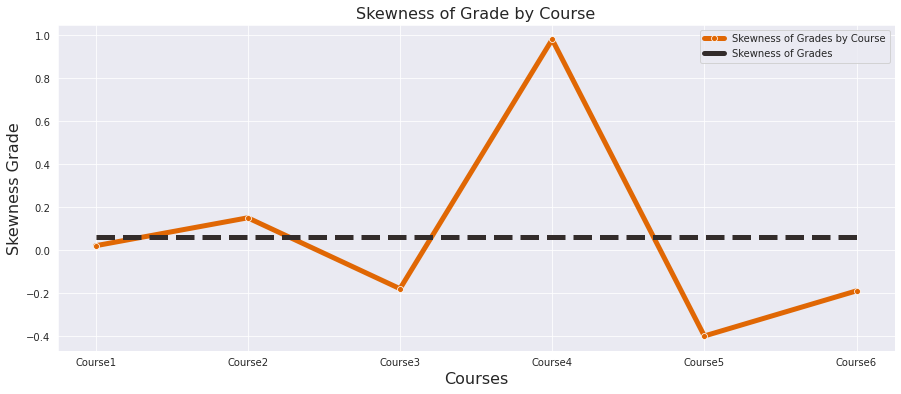

In [25]:
grade_course('Skewness')
plt.savefig('k.jpg')

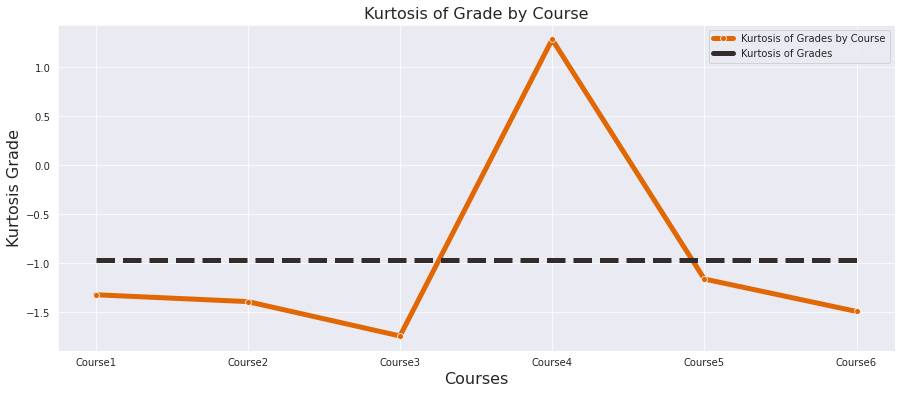

In [26]:
grade_course('Kurtosis')
plt.savefig('a.jpg')

#  Creating sparklines and histograms next to the dataframe

In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:82% !important; }</style>"))
HTML('''<style>
                    .right_aligned_df td { text-align: right; }
                    .left_aligned_df td { text-align: right; }
                    .pink_df { background-color: #fb8500; }
                </style>''')

In [28]:
def bar_inline_s(data, figsize=(0.5, 1)):
    d = ['a','b','c','d','e','f']
    
    fig, ax = plt.subplots(1, 1, figsize=(3,1))
    ax = sns.barplot(x=d, y=data, color='#ffd100')
    for k,v in ax.spines.items():
            v.set_visible(False)
    
    sns.set(rc={'axes.facecolor':'#202020', 'figure.facecolor':'#202020'})

    ax.set_xticks([])
    ax.set_yticks([]) 
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

def bar_inline(data, figsize=(4, 0.25)):
    d = ['a','b','c','d','e','f','g','h','i','j','k']
    
    fig, ax = plt.subplots(1, 1, figsize=(3,1))
    ax = sns.barplot(x=d, y=data, color='#ffd100')
    for k,v in ax.spines.items():
            v.set_visible(False)
    sns.set(rc={'axes.facecolor':'#202020', 'figure.facecolor':'#202020'})
    ax.set_xticks([])
    ax.set_yticks([]) 
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

In [29]:
def sp_inline_s(data, figsize=(0.5, 1)):
    d = ['a','b','c','d','e','f']
    
    fig, ax = plt.subplots(1, 1, figsize=(3,1))
    ax = sns.lineplot(x=d, y=data, color='#ffd100', linewidth=3)
    for k,v in ax.spines.items():
            v.set_visible(False)
    sns.set(rc={'axes.facecolor':'#202020', 'figure.facecolor':'#202020'})

    ax.set_xticks([])
    ax.set_yticks([]) 
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

def sp_inline(data, figsize=(4, 0.25)):
    d = ['a','b','c','d','e','f','g','h','i','j','k']
    
    fig, ax = plt.subplots(1, 1, figsize=(3,1))
    ax = sns.lineplot(x=d, y=data, color='#ffd100', linewidth=3)
    for k,v in ax.spines.items():
            v.set_visible(False)
    sns.set(rc={'axes.facecolor':'#202020', 'figure.facecolor':'#202020'})
    ax.set_xticks([])
    ax.set_yticks([]) 
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

In [30]:
df.head(3)

,Students,Course1,Course2,Course3,Course4,Course5,Course6
0,a,3,9,9,3,8,9
1,b,8,8,7,4,8,8
2,c,9,10,9,9,6,10


In [31]:
test = df.T
test.columns = test.iloc[0]
test = test[1:]
# test['Histogram'] = sprk
# test['Scores'] = sprk
# test = test.T
test

Students,a,b,c,d,e,f,g,h,i,j,k
Course1,3,8,9,4,7,10,5,6,4,7,10
Course2,9,8,10,7,9,7,9,9,8,7,7
Course3,9,7,9,4,8,4,8,5,6,5,9
Course4,3,4,9,2,4,3,5,4,4,1,7
Course5,8,8,6,7,7,4,7,6,4,4,6
Course6,9,8,10,9,9,8,10,10,10,9,8


In [32]:
hh = []
for i, row in test.iterrows():
    hh.append(row)

hist_list = []
score_list = []


list(hh[0])
for i in range(6):
    x = list(hh[i])
    x = bar_inline(x)
    hist_list.append(x)
    
    x = list(hh[i])
    x = sp_inline(x)
    score_list.append(x)    

,Course1,Course2,Course3,Course4,Course5,Course6
Students,,,,,,
a,3,9,9,3,8,9
b,8,8,7,4,8,8
c,9,10,9,9,6,10
d,4,7,4,2,7,9
e,7,9,8,4,7,9
f,10,7,4,3,4,8
g,5,9,8,5,7,10
h,6,9,5,4,6,10
i,4,8,6,4,4,10

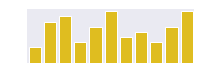
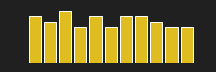
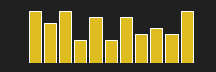
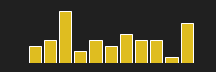
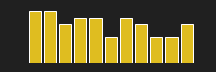
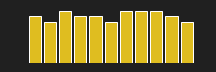
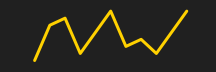
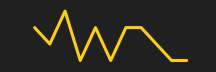
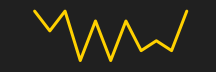
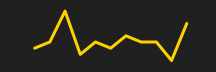
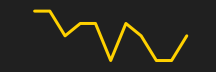
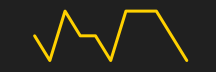

In [33]:
test['Histogram'] = hist_list
test['Scores'] = score_list

test = test.T
test
HTML(test.to_html(escape=False))


In [34]:
# Creating the Columns with Inline plot

hh = []
for i, row in test.iterrows():
    hh.append(row)

hh

hhh=[]
for i in range(11):
    hhh.append(hh[i])

hist_list = []
score_list = []
list(hhh[0][:6])

for i in range(11):
    x = list(hhh[i][:6])
    x = bar_inline_s(x)
    hist_list.append(x)
    
    x = list(hhh[i][:6])
    x = sp_inline_s(x)
    score_list.append(x)

hist_list.append(' ')
hist_list.append(' ')
score_list.append(' ')
score_list.append(' ')


,Course1,Course2,Course3,Course4,Course5,Course6,Histogram,Scores
Students,,,,,,,,
a,3,9,9,3,8,9,,
b,8,8,7,4,8,8,,
c,9,10,9,9,6,10,,
d,4,7,4,2,7,9,,
e,7,9,8,4,7,9,,
f,10,7,4,3,4,8,,
g,5,9,8,5,7,10,,
h,6,9,5,4,6,10,,
i,4,8,6,4,4,10,,

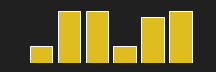
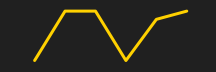
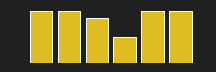
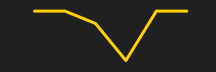
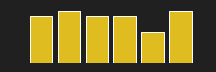
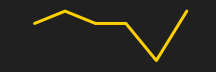
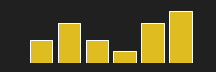
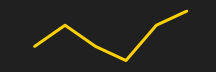
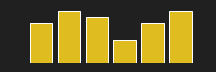
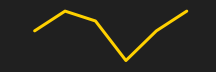
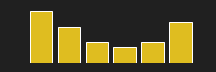
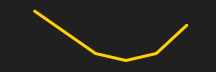
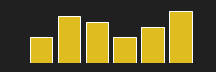
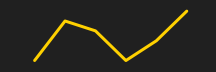
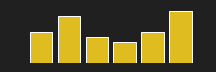
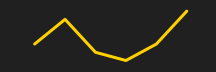
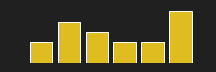
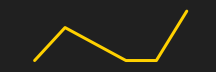
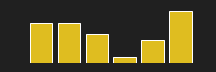
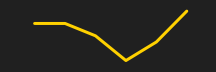
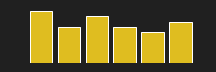
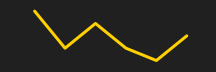
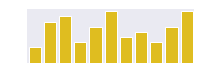
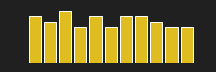
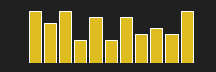
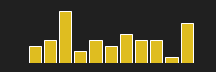
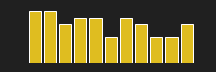
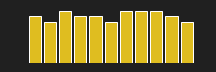
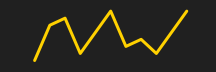
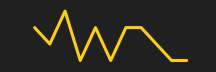
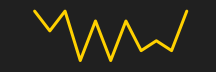
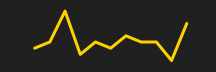
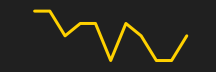
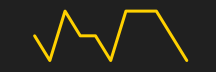

In [35]:
test['Histogram'] = hist_list
test['Scores'] = score_list

HTML(test.to_html(escape=False))
